In [199]:
import pandas as pd                  # For data loading and manipulation
import numpy as np                   # For numerical operations
import matplotlib.pyplot as plt      # For data visualization
from sklearn.model_selection import train_test_split  # For splitting data into train and test sets
from sklearn.preprocessing import StandardScaler      # For scaling data
from sklearn.linear_model import LinearRegression     # For linear regression
from sklearn.tree import DecisionTreeClassifier       # For decision tree classification
from sklearn.ensemble import RandomForestClassifier   # For random forest classification
from sklearn.decomposition import PCA                 # For Principal Component Analysis
from matplotlib.patches import Ellipse                # For Error of Eclise of Covarience matrix 
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

              

In [180]:
# Read the dataset into a DataFrame
bc_data = pd.read_csv("datasets/breast-cancer-wisconsin.data", 
                      header=None, 
                      sep=",")

# Modify the column names
bc_data.columns = ["sample_code_number", 
                   "clump_thickness", 
                   "uniformity_of_cell_size", 
                   "uniformity_of_cell_shape", 
                   "marginal_adhesion", 
                   "single_epithelial_cell_size", 
                   "bare_nuclei", 
                   "bland_chromatin", 
                   "normal_nucleoli", 
                   "mitosis", 
                   "classes"]

# Modify the classes column
bc_data["classes"] = bc_data["classes"].replace({2: "benign", 4: "malignant"})


In [181]:
bc_data.head()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,classes
0,1000025,5,1,1,1,2,1,3,1,1,benign
1,1002945,5,4,4,5,7,10,3,2,1,benign
2,1015425,3,1,1,1,2,2,3,1,1,benign
3,1016277,6,8,8,1,3,4,3,7,1,benign
4,1017023,4,1,1,3,2,1,3,1,1,benign


In [182]:
#Dropping missing values
bc_data.dropna(axis=1)
#Checking if there are any missing values left
bc_data.isnull()

,sample_code_number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,classes
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
694,False,False,False,False,False,False,False,False,False,False,False
695,False,False,False,False,False,False,False,False,False,False,False
696,False,False,False,False,False,False,False,False,False,False,False
697,False,False,False,False,False,False,False,False,False,False,False


Trying out various EDA tools

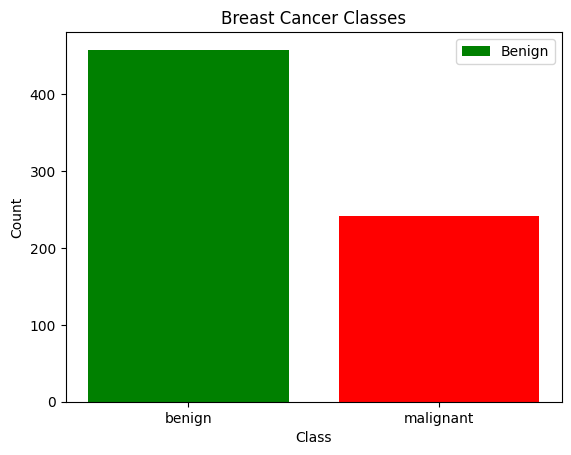

In [183]:
# Get the value counts for each class
class_counts = bc_data['classes'].value_counts()

# Create the bar graph
plt.bar(class_counts.index, class_counts, color=['green', 'red'])


# Add labels and title
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Breast Cancer Classes")

plt.legend(labels=['Benign', 'Malignant'])

# Show the graph

plt.savefig("images/bar_graph_distribution.png")
plt.show()

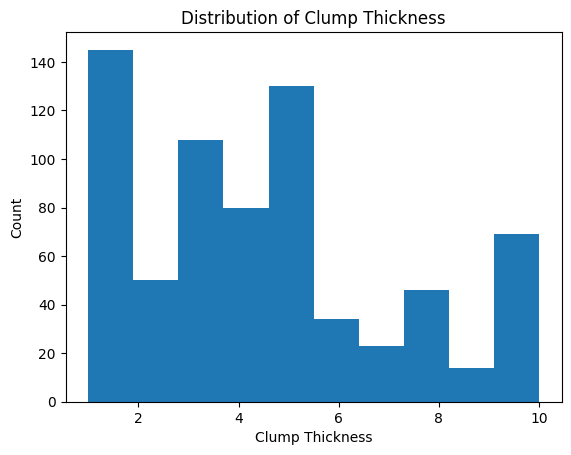

In [184]:
#Plotting Histogram

plt.hist(bc_data["clump_thickness"], bins = 10)

# Add labels and title
plt.xlabel("Clump Thickness")
plt.ylabel("Count")
plt.title("Distribution of Clump Thickness")

plt.savefig("images/distribution_clump_thickness.png")
plt.show()

In [185]:
old_column_names = bc_data.columns.tolist()

# create a dictionary to map the old column names to integers
new_column_names = {old_column_names[i]: i for i in range(len(old_column_names))}

# rename the columns using the dictionary
numpy_pre = bc_data.rename(columns=new_column_names)

X_left = numpy_pre.to_numpy()[:,1:6]
X_right = numpy_pre.to_numpy()[:,7:-1]
X = np.concatenate((X_left, X_right),axis=1)
numpy_pre_2 =(numpy_pre[10].map({'malignant': 1, 'benign': 0}))




In [186]:
y = numpy_pre_2.to_numpy()
print(y.shape)

(699,)


In [187]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape


((559, 8), (559,))

Accuracy: 0.96


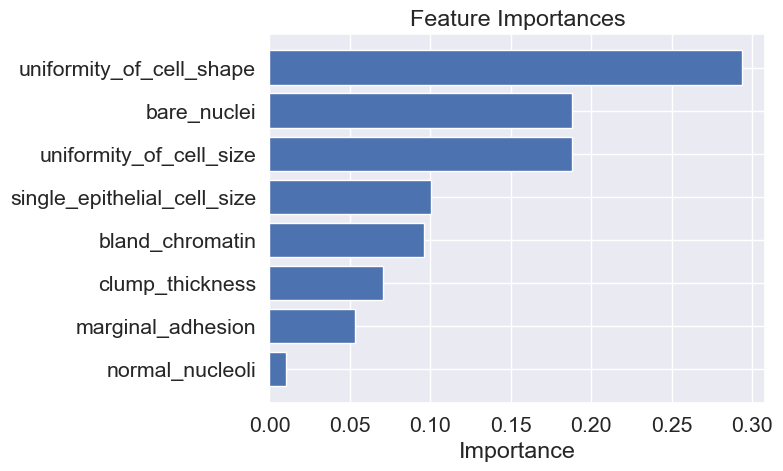

In [203]:
# define and fit the random forest model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# plot feature importances
importances = model.feature_importances_
sorted_idx = np.argsort(importances)
features = bc_data.columns[1:]
plt.barh(range(len(sorted_idx)), importances[sorted_idx])
plt.yticks(range(len(sorted_idx)), features[sorted_idx])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.savefig("images/feature_importance_random_forest.png")

plt.show()

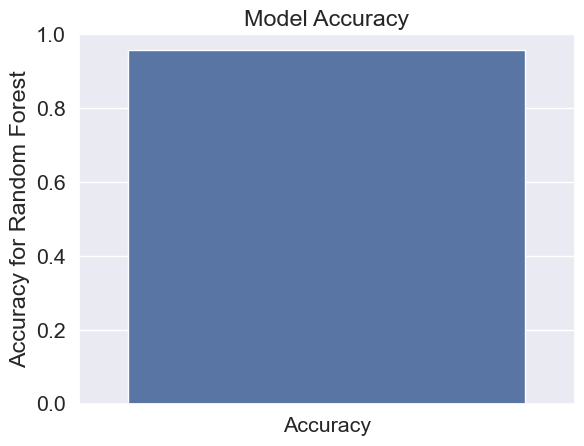

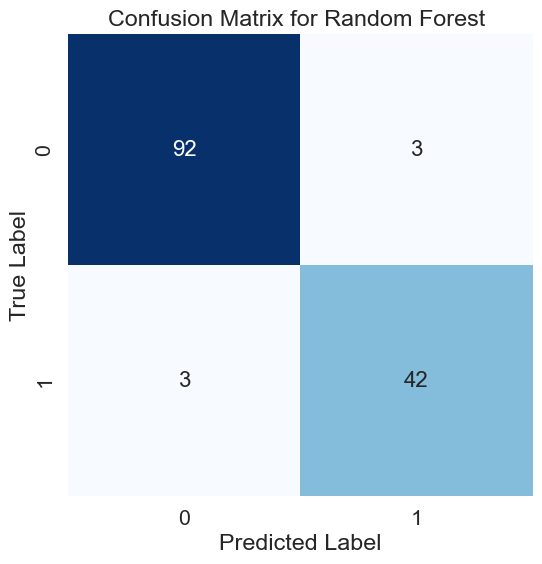

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns

# assuming y_true and y_pred are the true and predicted labels, respectively
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# plot accuracy
plt.figure()
sns.set(font_scale=1.4)
sns.barplot(x=["Accuracy"], y=[acc])
plt.ylim([0, 1])
plt.title("Model Accuracy")
plt.ylabel("Accuracy for Random Forest")
plt.savefig("images/accuracy_random_forest.png")

plt.show()

# plot confusion matrix
plt.figure(figsize=(6, 6))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 16}, cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Random Forest ")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.savefig("images/cm_random_forest.png")
plt.show()


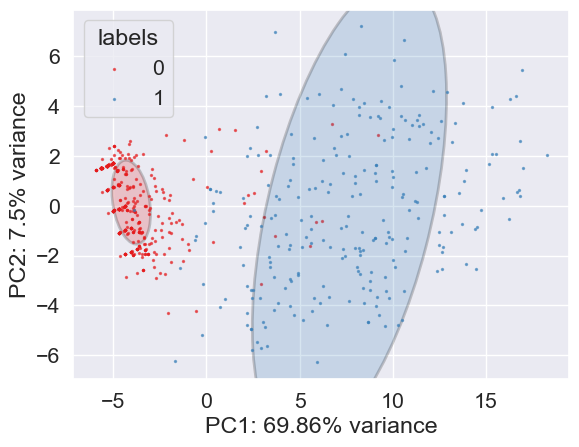

In [206]:
# perform PCA and extract scores
pca = PCA(n_components=2)
pca_output = pca.fit_transform(X)

# create dataframe for plotting
pca_output = pd.DataFrame(pca_output, columns=['PC1', 'PC2'])
pca_output['labels'] = y

# calculate centroids
centroids = pca_output.groupby('labels').mean()

# calculate ellipses for each group
conf_rgn = []
for label in np.unique(pca_output['labels']):
    cov = np.cov(pca_output[pca_output['labels'] == label][['PC1', 'PC2']].T)
    centre = centroids.loc[label, ['PC1', 'PC2']]
    ellipse = Ellipse(xy=centre, width=cov[0, 0], height=cov[1, 1],
                      angle=np.degrees(np.arccos(cov[0, 1] / np.sqrt(cov[0, 0] * cov[1, 1]))),
                      edgecolor='black', fc='none', lw=2)
    conf_rgn.append({'label': label, 'ellipse': ellipse})

# plot results
fig, ax = plt.subplots()
for label in np.unique(pca_output['labels']):
    ax.add_artist(conf_rgn[int(label)]['ellipse'])
    conf_rgn[int(label)]['ellipse'].set_clip_box(ax.bbox)
    conf_rgn[int(label)]['ellipse'].set_alpha(0.2)
    conf_rgn[int(label)]['ellipse'].set_facecolor(plt.cm.Set1(int(label)))
    ax.scatter(x=pca_output.loc[pca_output['labels'] == label, 'PC1'],
               y=pca_output.loc[pca_output['labels'] == label, 'PC2'],
               color=plt.cm.Set1(int(label)),
               alpha=0.6, s=2, label=label)
ax.set_xlabel(f"PC1: {round(pca.explained_variance_ratio_[0]*100, 2)}% variance")
ax.set_ylabel(f"PC2: {round(pca.explained_variance_ratio_[1]*100, 2)}% variance")
ax.legend(loc='best', title='labels')
plt.savefig("images/pca.png")

plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:848: FutureWarn

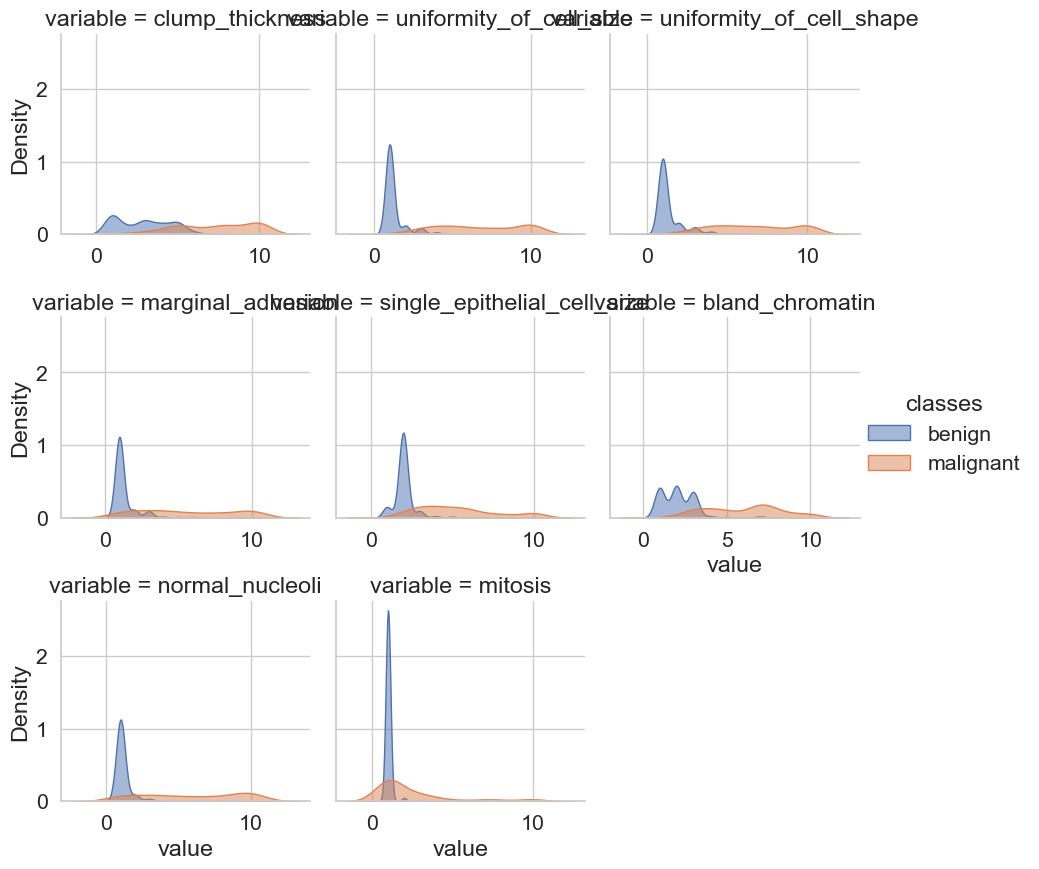

In [211]:
bc_data_gather = pd.melt(bc_data, id_vars=['classes'], value_vars=['clump_thickness', 'uniformity_of_cell_size', 'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 'bland_chromatin', 'normal_nucleoli', 'mitosis'])

# plot the density plot using seaborn
sns.set_style("whitegrid")
g = sns.FacetGrid(data=bc_data_gather, col="variable", hue="classes", col_wrap=3, sharex=False)
g.map(sns.kdeplot, "value", alpha=.5, shade=True)
g.add_legend()
plt.savefig("images/density_plot.png")

